In [3]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/drive/MyDrive/pro aqi/PRO AQI/Real-Data/Real_Combine.csv')


In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

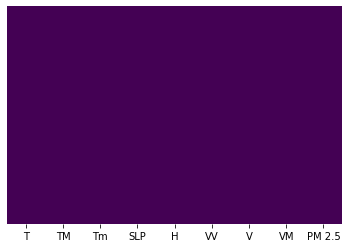

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [14]:
X = df.iloc[:,:-1]#independent 
y = df.iloc[:,-1]#dependent 

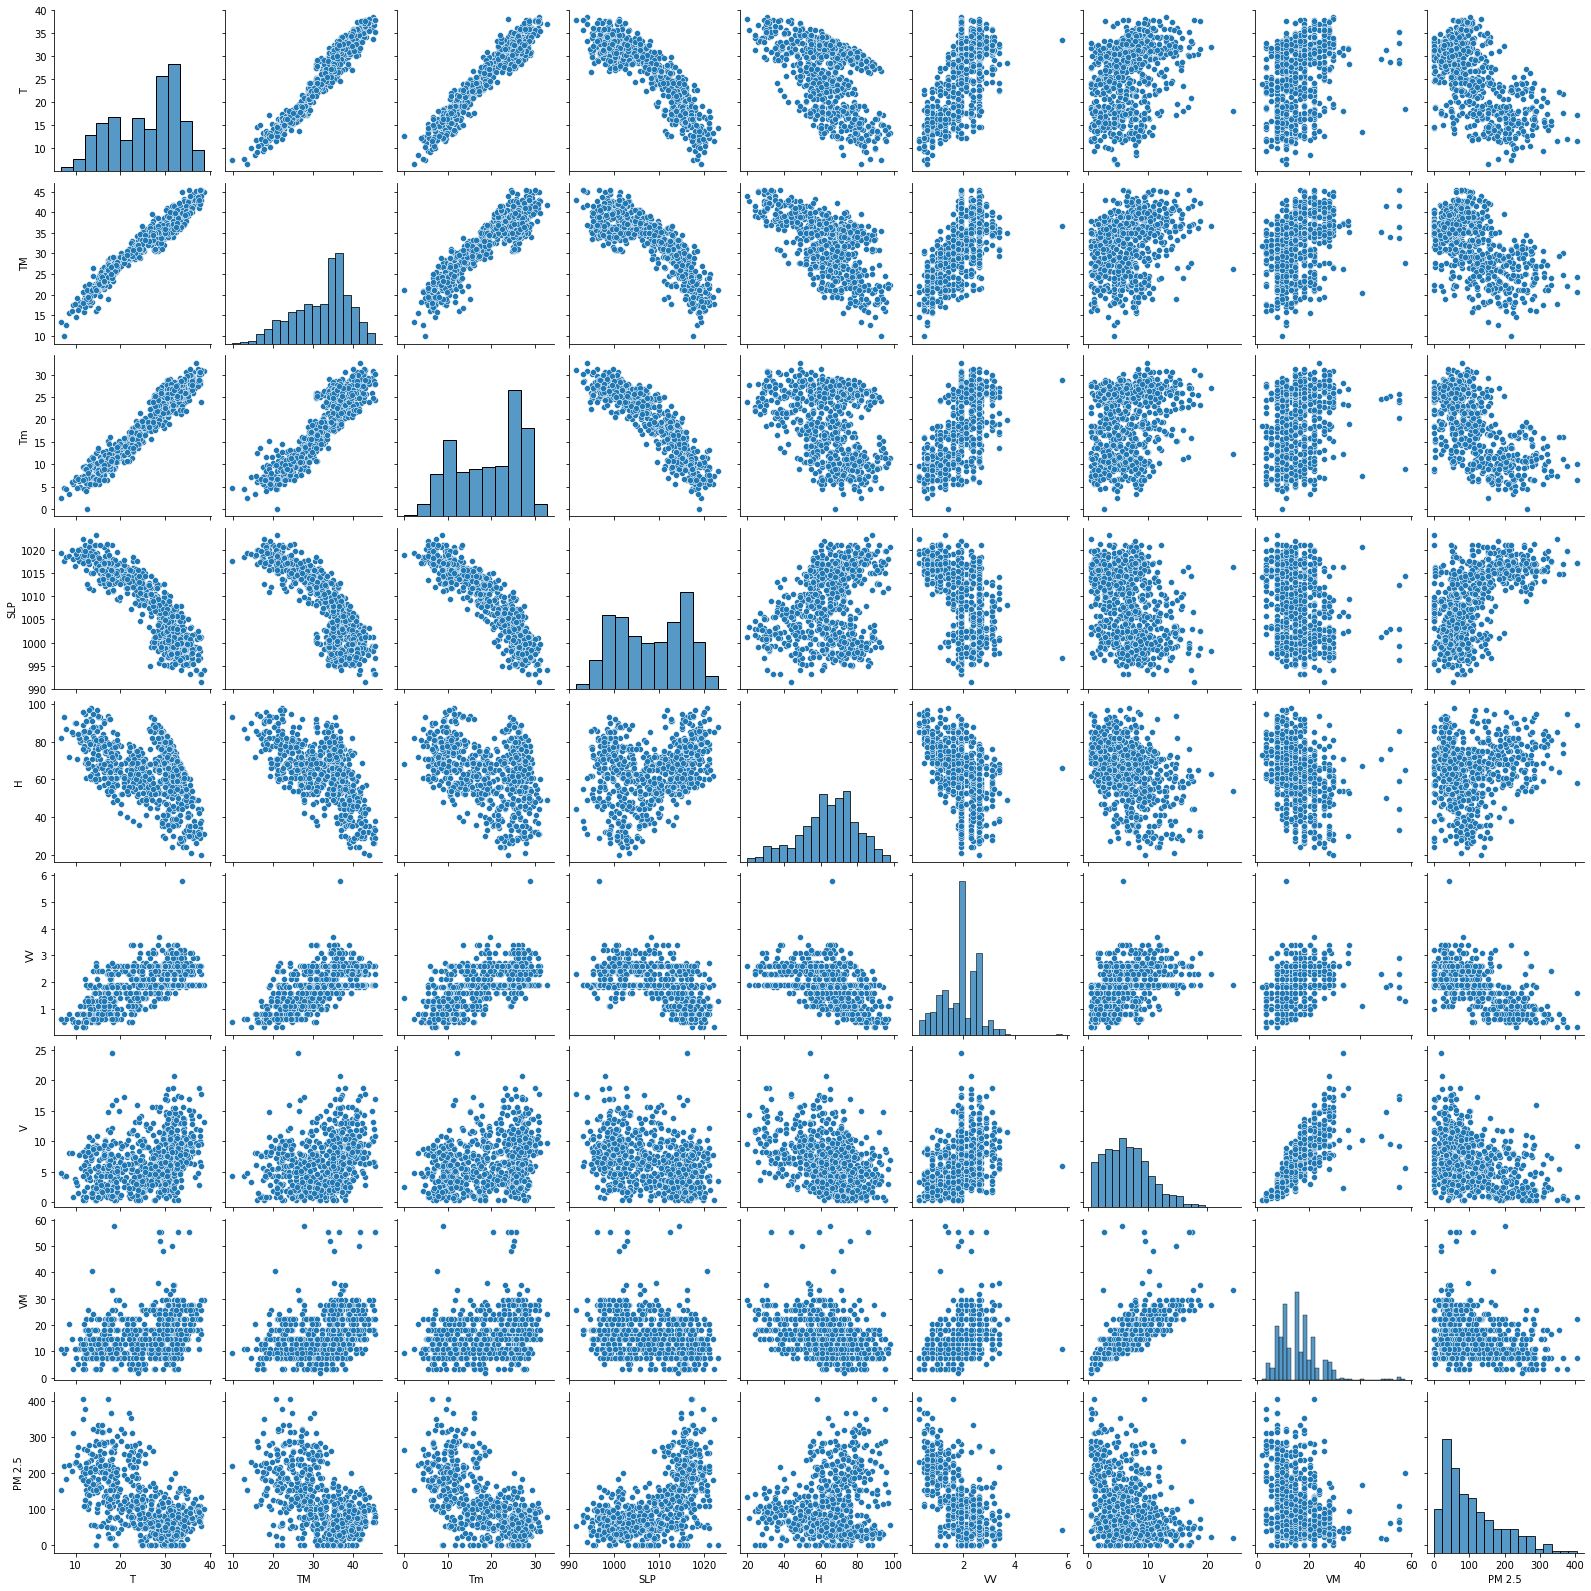

In [11]:
sns.pairplot(df)#multivariate analysis relan of many featires and how each features related behave with each other

#the main focus is on pm 2.5 last feature 

In [15]:
#dont have any pattern in pm 2.5 respect to other 
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


In [ ]:
#negative  correlation in may   ,, slp has +ve


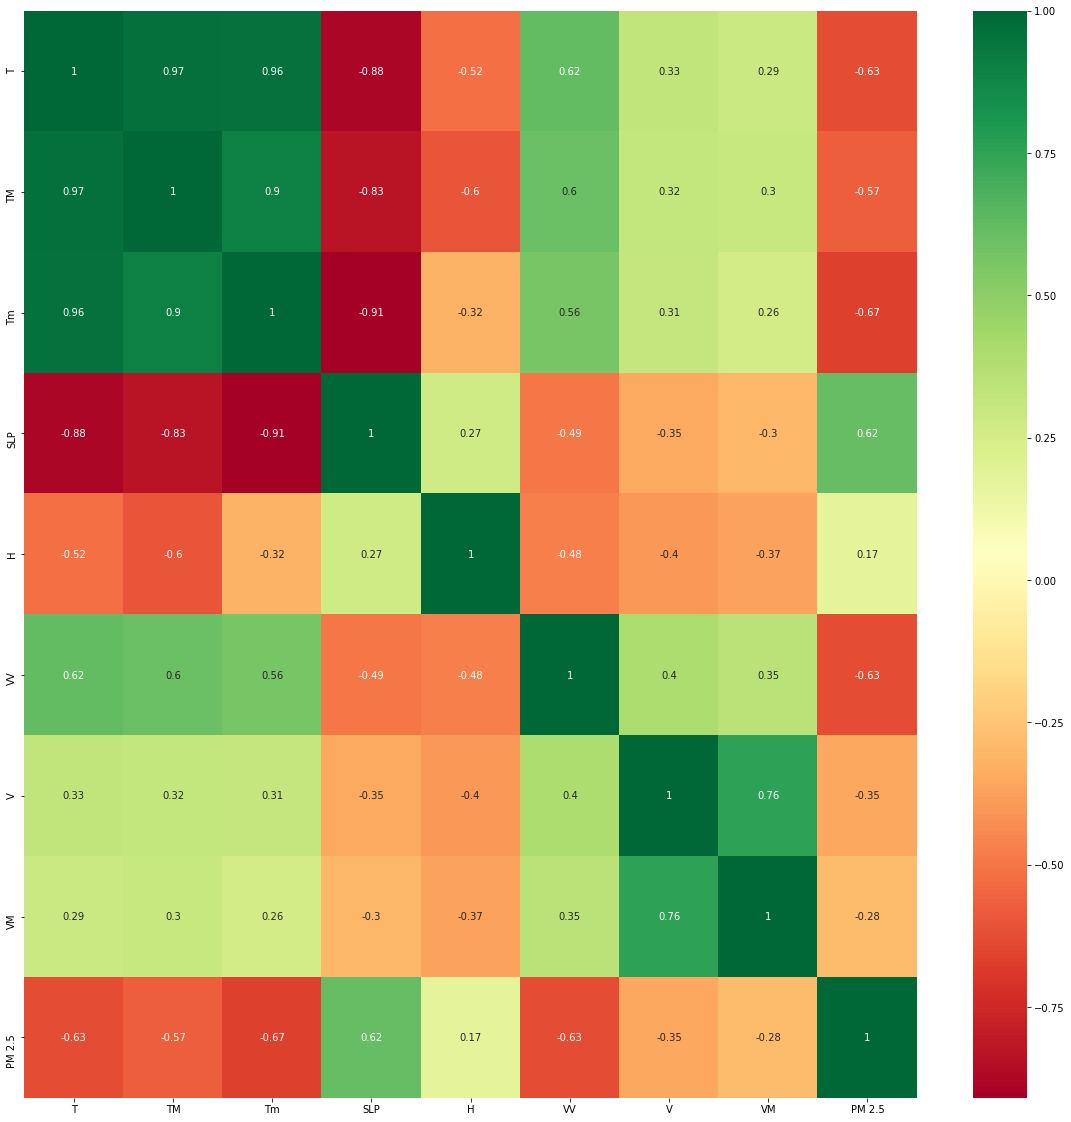

In [16]:
#CORRELATION WITH HEATMAP
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [17]:

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [18]:
print(model.feature_importances_)

[0.14331056 0.11250558 0.16468661 0.13678996 0.08316225 0.27221243
 0.04890771 0.03842489]


In [19]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


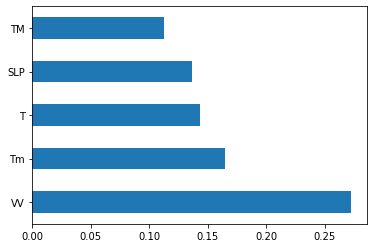

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


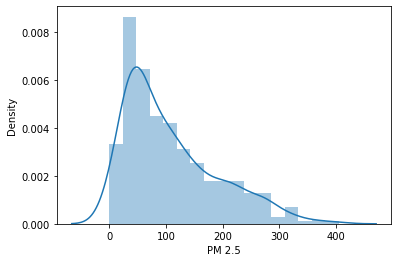

In [21]:
sns.distplot(y)

In [ ]:
#y is right skwed


In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [ ]:
regressor.score(X_train, y_train)

0.6007706404750854

In [ ]:
regressor.score(X_test, y_test)

0.5316188612878152

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)#take random random 1092/5data and calc 

In [ ]:
score.mean()

0.4672436225852337

Model Evaluation


In [ ]:
prediction=regressor.predict(X_test)

In [ ]:
prediction

array([ 189.33203792,  242.24961682,  244.4703608 ,   92.25565539,
        127.85314121,   47.02861996,   18.34426231,  204.20476087,
         57.00374483,  114.48318633,  154.31677169,  159.24589032,
        122.23767954,  202.37875249,  193.14582279,  199.31056617,
         77.70532217,   23.59159547,  140.35618721,   51.96119051,
         52.79032253,  171.73215813,   10.02662778,  195.39590735,
        209.65256071,   74.99359732,  108.00250348,  104.43088255,
         36.82517046,  107.70799932,  162.34530641,   97.66978551,
         22.95042947,  144.49906438,  185.04431819,  120.9811852 ,
        147.70774514,  188.20412429,   68.89958492,  161.89925135,
         73.04961493,  223.09338261,   15.64591126,   73.87857951,
        138.14114584,   39.49747947,  238.05967758,   91.3082908 ,
         96.61833849,   35.85279287,  104.00194382,  167.8782917 ,
         33.77103417,  206.3441888 ,  171.79678132,   86.49544245,
        144.56984663,   21.58010751,   61.03874235,  182.79433

In [ ]:
#decison tree regresoor

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor(criterion='mse')

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
dtree.score(X_test, y_test)

0.2817283381682344

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(dtree,X,y,cv=5)

In [ ]:
score.mean()

0.4672436225852337

tree visualisation


In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
features = list(df.columns[:-1])


In [ ]:
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [ ]:
import os


random foreast 

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()

In [27]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
rf.score(X_train,y_train)

0.9497868094015213

In [29]:
rf.score(X_test,y_test)

0.6412609427124469

In [32]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [33]:
score.mean()

0.4672436225852337

In [34]:
prediction=regressor.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.28335537132941
MSE: 3057.664128674138
RMSE: 55.29614931144969


In [37]:

from sklearn.model_selection import RandomizedSearchCV

In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [40]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [50, 110, 171, 231, 292, 352, 413, 473, 534, 594, 655, 715, 776, 836, 897, 957, 1018, 1078, 1139, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1139, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=715, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=715, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   1.6s
[CV] n_estimators=715, min_samp

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [44]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1078}

In [47]:
predictions1=rf_random.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.28335537132941
MSE: 3057.664128674138
RMSE: 55.29614931144969


In [51]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 35.35340043851651
MSE: 2523.062390246538
RMSE: 50.23009446782415


In [52]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)